## Dependencies

```
# 60.19/20
01c932213afb09e5df84b8f061315ccaf01150b4  ../../data/shehui/shehui_phones_loglik.csv
1dc688287a27da6582e17cc3e04ad8fe1a928ce4  ../../data/shehui/shehui_feats.csv
```

In [1]:
phones_df_path = "../../data/shehui/shehui_phones_loglik.csv"
feats_df_path = "../../data/shehui/shehui_feats.csv"
annot_path = "../../data/shehui/shehui_judge.csv"  # manual annotation
!sha1sum $phones_df_path $feats_df_path $annot_path

01c932213afb09e5df84b8f061315ccaf01150b4  ../../data/shehui/shehui_phones_loglik.csv
1dc688287a27da6582e17cc3e04ad8fe1a928ce4  ../../data/shehui/shehui_feats.csv
7338ee4755f5853be3cd6a3ce7711553485e84fc  ../../data/shehui/shehui_judge.csv


## Load Data

In [2]:
import pandas as pd
WORD = "社會"
phones_df = pd.read_csv(phones_df_path)
feats_df = pd.read_csv(feats_df_path)
annot_df = pd.read_csv(annot_path, header=None, names=["utt_id", "annot"])
annot_df.annot.fillna("ʂ", inplace=True)
annot_df.annot = annot_df.annot.str.replace("d", "s")

In [3]:
phones_df.shape, annot_df.shape

((3864, 49), (101, 2))

In [4]:
phones_df.head()

,utt_id,t,phone,ml_phone,sil,spn,a,aj,aw,o,...,ts,tsʰ,ɕ,z,z̩,s,ŋ,ŋ̍,ɻ,ʔ
0,XSH_GY_3144,0,s,s,-7.681640,-6.503642,-4.345111,-8.721248,-8.010677,-7.272399,...,-1.886970,-3.645827,-3.640338,-4.887408,-2.941501,-1.147632,-5.503642,-5.503642,-12.391040,-16.211841
1,XSH_GY_3144,1,s,ts,-5.310816,-6.586954,-8.147581,-10.421438,-7.652265,-7.322141,...,-1.226126,-3.822740,-3.268888,-6.033983,-4.088075,-1.321073,-7.533209,-7.533209,-12.929338,-17.819410
2,XSH_GY_3144,2,s,ts,-5.749047,-5.802193,-6.734258,-7.944333,-8.090920,-8.237176,...,-0.969098,-3.513551,-3.404324,-6.641660,-4.695748,-1.230424,-8.741521,-8.741521,-12.683087,-18.482972
3,XSH_GY_3144,3,s,s,-6.987211,-4.373899,-9.618829,-8.396303,-8.528719,-8.476888,...,-1.617296,-4.674959,-2.562410,-7.692209,-5.746301,-0.717901,-8.726934,-8.726934,-13.768919,-20.936250
4,XSH_GY_3144,4,s,s,-4.199553,-4.513033,-7.592516,-7.766592,-6.352526,-8.014597,...,-3.196867,-5.620840,-1.458639,-7.029349,-5.083437,-0.723299,-6.967547,-6.967547,-13.110853,-17.870264


In [5]:
annot_df.head()

,utt_id,annot
0,CJH_GY_1544,ʂ
1,CJH_GY_2944,ʂ
2,CJJ_GY_3607,ʂ
3,CJJ_GY_3612,ʂ
4,CJJ_GY_3628,ʂ


In [6]:
onset_phone = phones_df.groupby("utt_id").first().iloc[:, :2]
onset_phone.phone.value_counts()

phone
s    91
ʂ    10
Name: count, dtype: int64

In [7]:
annot_df.annot.value_counts()

annot
s    73
ʂ    28
Name: count, dtype: int64

In [8]:
annot_df = annot_df.join(onset_phone, on="utt_id")
# annot_df.set_index("id").join(onset_phone.set_index("utt_id")


In [9]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
print(classification_report(annot_df.annot, annot_df.phone))

              precision    recall  f1-score   support

           s       0.77      0.96      0.85        73
           ʂ       0.70      0.25      0.37        28

    accuracy                           0.76       101
   macro avg       0.73      0.60      0.61       101
weighted avg       0.75      0.76      0.72       101



Text(0.5, 0, 'Forced-alignment')

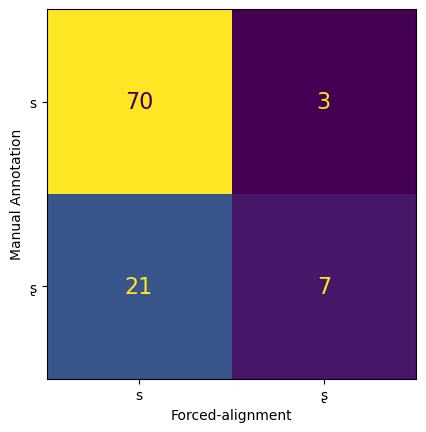

In [10]:
import matplotlib.pyplot as plt
cm_disp = ConfusionMatrixDisplay(confusion_matrix(annot_df.annot, annot_df.phone), 
                       display_labels=["s", "ʂ"])
cm_disp.plot(colorbar=False, text_kw={"fontsize": 16})
plt.ylabel("Manual Annotation")
plt.xlabel("Forced-alignment")